In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('..\\Assests\\data\\final_insurance_data.csv')


<Axes: >

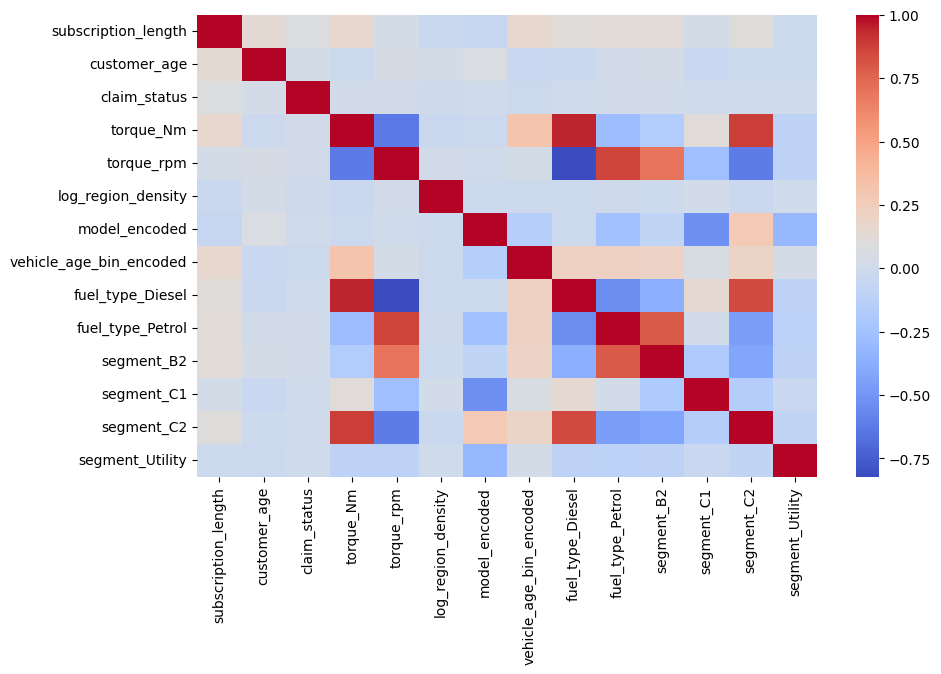

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)


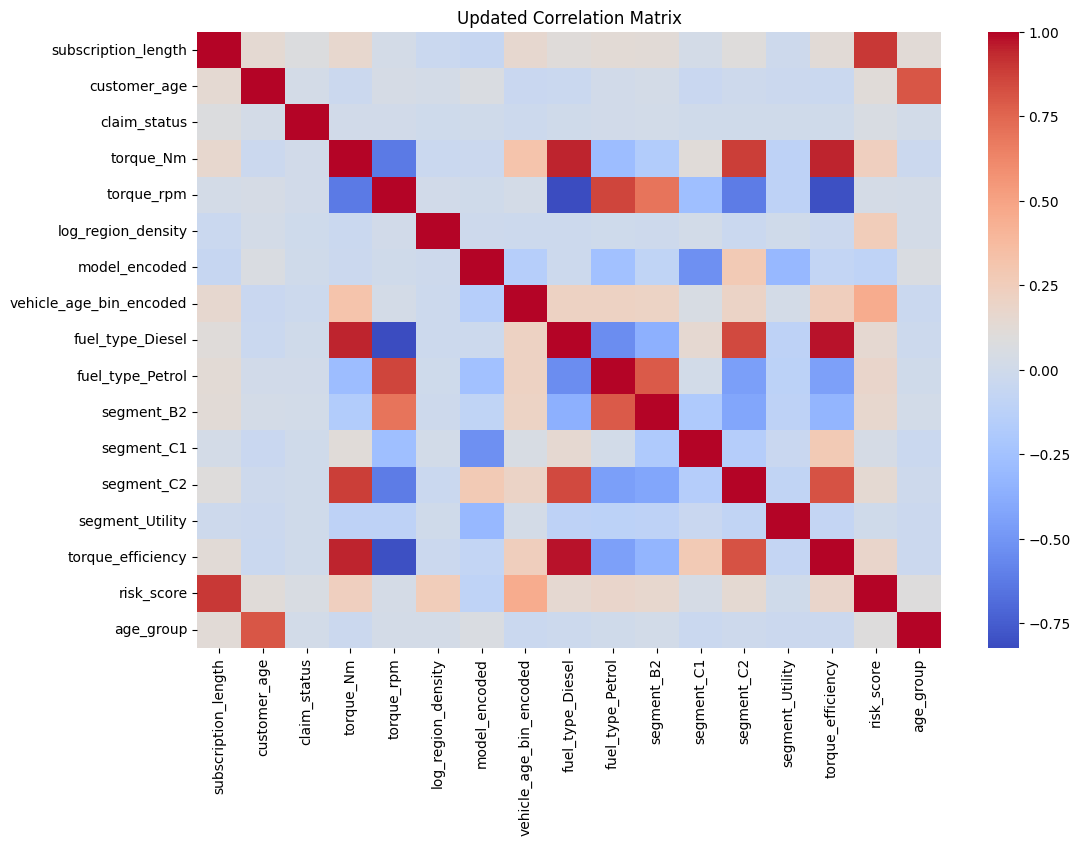

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded=df
# Add new features first
df_encoded['torque_efficiency'] = df_encoded['torque_Nm'] / df_encoded['torque_rpm']
df_encoded['risk_score'] = (
    df_encoded['subscription_length'] * 0.2 +
    df_encoded['vehicle_age_bin_encoded'] * 0.5 +
    df_encoded['log_region_density'] * 0.3
)
df_encoded['age_group'] = pd.cut(df_encoded['customer_age'], bins=[0, 35, 50, 100], labels=[0, 1, 2]).astype(int)

# Correlation check
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Updated Correlation Matrix")
plt.show()


In [5]:
cols_to_drop = [
    'torque_Nm',             # replaced by torque_efficiency
    'torque_rpm',            # replaced by torque_efficiency
    'age_group'              # drop if keeping customer_age (continuous)
]
df_encoded = df_encoded.drop(columns=cols_to_drop)


In [6]:
df_encoded.to_csv('final_insurance_dataV2.csv')